# Regressão Linear com EQM - Housing Dataset

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

#### Leitura dos dados

In [11]:
dados = pd.read_csv('./dataset/HousePrices_HalfMil.csv', sep=',')

In [12]:
dados.head()

,Prices,Area,Garage,Baths,FirePlace,Floors,Swiming Pool
0,43800,164,2,2,0,0,0
1,37550,84,2,4,0,1,1
2,49500,190,2,4,4,0,0
3,50075,75,2,4,4,1,1
4,52400,148,1,2,4,1,1


In [13]:
dados.shape

(500000, 7)

### Análises Preliminares

In [15]:
dados.corr().round(4)

,Prices,Area,Garage,Baths,FirePlace,Floors,Swiming Pool
Prices,1.0000,0.1477,0.1003,0.1451,0.0891,0.6195,0.0018
Area,0.1477,1.0000,-0.0009,-0.0004,0.0004,-0.0008,0.0006
Garage,0.1003,-0.0009,1.0000,-0.0036,0.0013,-0.0009,0.0011
Baths,0.1451,-0.0004,-0.0036,1.0000,0.0006,-0.0009,0.0022
FirePlace,0.0891,0.0004,0.0013,0.0006,1.0000,0.0002,0.0013
Floors,0.6195,-0.0008,-0.0009,-0.0009,0.0002,1.0000,-0.0002
Swiming Pool,0.0018,0.0006,0.0011,0.0022,0.0013,-0.0002,1.0000


- Matriz de correlação

O coeficiente de correlação é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.

### Distribuição de frequências da variável dependente (y)

/tmp/ipykernel_40475/4292671569.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x)


<AxesSubplot: title={'center': 'Distribuição de Frequências'}, ylabel='Frequências'>

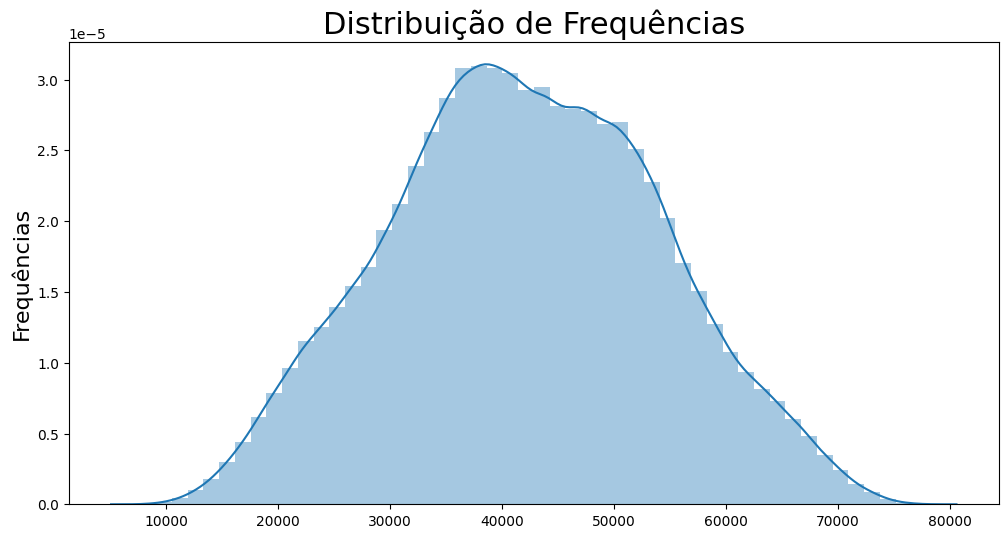

In [17]:
import seaborn as sns


x = pd.DataFrame(dados["Prices"])
ax = sns.distplot(x)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequências", fontsize = 22)
ax.set_ylabel('Frequências', fontsize=16)
ax


## Estimando um Modelo de Regressão Linear

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
y = dados['Prices']

In [22]:
X = dados[['Area','Garage','Baths','FirePlace','Floors','Swiming Pool']]

### Criando um dataset de treino e teste

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 43)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

### Avaliando os resultados de treinamento

In [37]:
# Para avaliar o modelo podemos utilizar o erro quadratico médio e o coeficiente de determinação
y_pred = modelo.predict(X_test)

In [38]:
print(f"Coeficiente de determinação R²: {r2_score(y_test, y_pred):.2f}")

Coeficiente de determinação R²: 0.45


In [39]:
print(f"Erro Quadrático Médio: {mean_squared_error(y_test, y_pred):.2f}")

Erro Quadrático Médio: 81343944.40


### Obtendo Previsões Pontuais

In [32]:
area = 130
garagem = 2
banheiros = 3
lareira= 1
marmore= 1
andares= 1
entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

print('O valor da casa estimado é R$ {0:.2f}'.format(modelo.predict(entrada)[0]))

O valor da casa estimado é R$ 48965.25


/home/lucas/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Salvando o Modelo estimado

In [43]:
import pickle

modeloFinal = open('modelo_preço','wb')
pickle.dump(modelo, modeloFinal)
modeloFinal.close()

### Para importar o Modelo Salvo

In [46]:
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('O valor da casa estimado é R$ {0:.2f}'.format(lm_new.predict(entrada)[0]))

O valor da casa estimado é R$ 35168.62


/home/lucas/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
